In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pylab as plt

In [3]:
#verilecek değerlerin tasarlanması
x_kalite = np.arange(0,11,1)
#kalite ve servis hizmetlerinin verilmesi
x_servis = np.arange(0,11,1)
#verilecek bahşişin yüzdeliği
x_bahsis = np.arange(0,26,1)

In [4]:
#üyelik fonksiyonunu oluşturma ve kullanma
kalite_dus = fuzz.trimf(x_kalite, [0,0,5])
kalite_ort = fuzz.trimf(x_kalite, [0,5,10])
kalite_yuk = fuzz.trimf(x_kalite, [5,10,10])
servis_dus = fuzz.trimf(x_servis, [0,0,5])
servis_ort = fuzz.trimf(x_servis, [0,5,10])
servis_yuk = fuzz.trimf(x_servis, [5,10,10])
bahsis_dus = fuzz.trimf(x_bahsis, [0,0,13])
bahsis_ort = fuzz.trimf(x_bahsis, [0,13,25])
bahsis_yuk = fuzz.trimf(x_bahsis, [13,25,25])

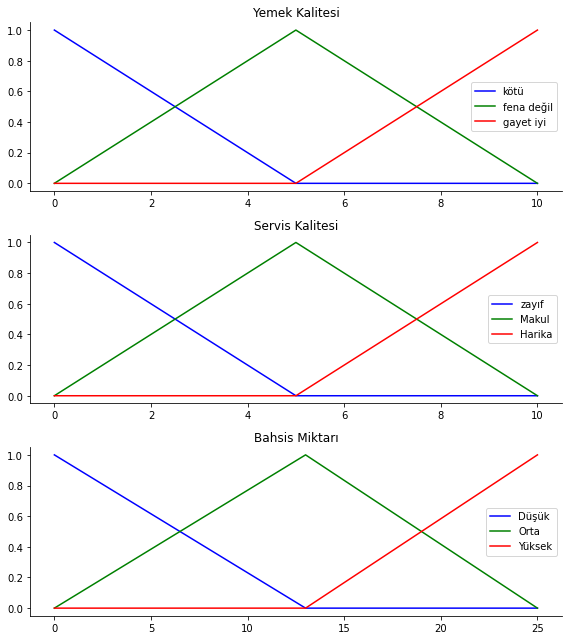

In [14]:
#değer ve üyelik fonksiyonlarının gösterilmesi
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_kalite, kalite_dus, 'b', linewidth = 1.5, label = "kötü")
ax0.plot(x_kalite, kalite_ort, 'g', linewidth = 1.5, label = "fena değil")
ax0.plot(x_kalite, kalite_yuk, 'r', linewidth = 1.5, label = "gayet iyi")
ax0.set_title("Yemek Kalitesi")
ax0.legend()

ax1.plot(x_servis, servis_dus, 'b', linewidth = 1.5, label = "zayıf")
ax1.plot(x_servis, servis_ort, 'g', linewidth = 1.5, label = "Makul")
ax1.plot(x_servis, servis_yuk, 'r', linewidth = 1.5, label = "Harika")
ax1.set_title("Servis Kalitesi")
ax1.legend()

ax2.plot(x_bahsis, bahsis_dus, 'b', linewidth= 1.5, label = "Düşük")
ax2.plot(x_bahsis, bahsis_ort, 'g', linewidth= 1.5, label = "Orta")
ax2.plot(x_bahsis, bahsis_yuk, 'r', linewidth= 1.5, label = "Yüksek")
ax2.set_title("Bahsis Miktarı")
ax2.legend()

#tepedeki ve sağdaki eksenleri kaldırma
for ax in (ax0, ax1, ax2):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [6]:
#aktivasyon fonksiyonları ile bu değerlerin aktif adilmesi
kalite_sev_dus = fuzz.interp_membership(x_kalite, kalite_dus, 5.5)
kalite_sev_ort = fuzz.interp_membership(x_kalite, kalite_ort, 5.5)
kalite_sev_yuk = fuzz.interp_membership(x_kalite, kalite_yuk, 5.5)

servis_sev_dus = fuzz.interp_membership(x_servis, servis_dus, 12.8)
servis_sev_ort = fuzz.interp_membership(x_servis, servis_ort, 12.8)
servis_sev_yuk = fuzz.interp_membership(x_servis, servis_yuk, 12.8)

In [7]:
#Birinci kural uygulanır
# ya da içerdiği için max alınır
kural1 = np.fmax(kalite_sev_dus, servis_sev_dus)
bahsis_aktif_dus = np.fmin(kural1, bahsis_dus)
print(kural1,bahsis_dus)


0.0 [1.         0.92307692 0.84615385 0.76923077 0.69230769 0.61538462
 0.53846154 0.46153846 0.38461538 0.30769231 0.23076923 0.15384615
 0.07692308 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [8]:
#ikinci kural uygulanır
bahsis_aktif_ort = np.fmin(servis_sev_ort, bahsis_ort)


In [9]:
#ücüncü kural uygulanır
kural3 = np.fmax(kalite_sev_yuk, servis_sev_yuk)
bahsis_aktif_yuk = np.fmin(kural3, bahsis_yuk)
bah0 = np.zeros_like(x_bahsis)


# Kümeleme işlemi ve verilerin bulanıklaştırılması yapılır.

In [10]:
#tüm çıkış fonksiyonları kümeleme
kümele = np.fmax(bahsis_aktif_dus, np.fmax(bahsis_aktif_ort, bahsis_aktif_yuk))

In [11]:
#sonuçları bulanıklaştırma
bahsis = fuzz.defuzz(x_bahsis, kümele, 'centroid')
bahsis_aktivasyon = fuzz.interp_membership(x_bahsis, kümele, bahsis)#grafik için


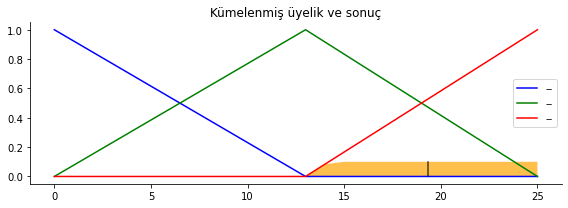

In [12]:
#değer ve üyelik fonksiyonlarının gösterilmesi
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_bahsis, bahsis_dus, 'b', linewidth = 1.5, label = "--")
ax0.plot(x_bahsis, bahsis_ort, 'g', linewidth = 1.5, label = "--")
ax0.plot(x_bahsis, bahsis_yuk, 'r', linewidth = 1.5, label = "--")
ax0.fill_between(x_bahsis, bah0, kümele, facecolor= 'Orange', alpha = 0.7)
ax0.plot([bahsis, bahsis], [0, bahsis_aktivasyon], 'k', linewidth= 1.5, alpha = 0.7)
ax0.set_title("Kümelenmiş üyelik ve sonuç")
ax0.legend()

#tepedeki ve sağdaki eksenleri kaldırma
for ax in (ax0, ax1, ax2):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()